## 1. Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importing data

In [4]:
newspaper_data = pd.read_csv('NewspaperData.csv')
newspaper_data.head(10)

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


## 3. Data Understanding

In [7]:
newspaper_data.shape

(34, 3)

In [4]:
newspaper_data.dtypes

Newspaper     object
daily        float64
sunday       float64
dtype: object

In [5]:
newspaper_data.isnull().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [4]:
newspaper_data.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [5]:
newspaper_data.median()

C:\Users\DS\AppData\Local\Temp/ipykernel_6664/3705858537.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  newspaper_data.median()


daily     355.2355
sunday    436.7125
dtype: float64

## 4. Assumptions check

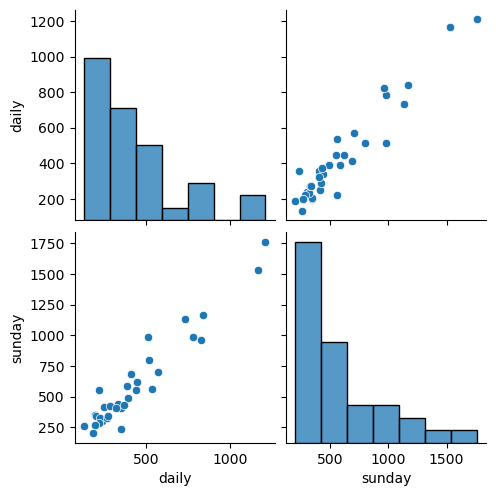

In [9]:
sns.pairplot(data=newspaper_data)

<Axes: >

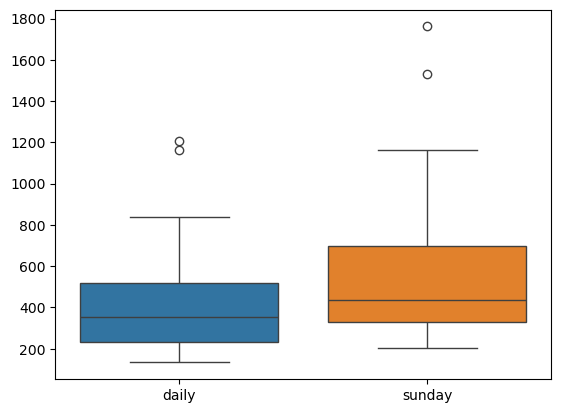

In [17]:
sns.boxplot(data=newspaper_data)

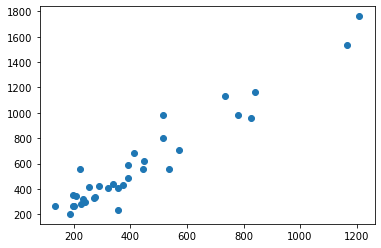

In [6]:
plt.scatter(x = 'daily',y = 'sunday', data = newspaper_data)

In [7]:
newspaper_data.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


## 5. Model Building and Model Training

Linear regression can be build using 2 libraries:

* statsmodels
* sklearn

In [19]:
import statsmodels.formula.api as sfa

In [20]:
#Building linear regression using ordinary least square technique
#linear_model = sfa.ols('Y~X',data).fit()
linear_model = sfa.ols('sunday~daily',data = newspaper_data).fit() # .fit()-to find intercept and Slope

In [12]:
linear_model.params

Intercept    13.835630
daily         1.339715
dtype: float64

## 6. Model Testing

In [11]:
new_data = pd.read_csv('newspaper_test_data.csv')
new_data

,daily
0,200
1,400
2,350
3,100


##### 6.1 Manual calculation

In [16]:
 1.339715*(200) + 13.835630

281.77862999999996

y = mx + c


  = 1.339715(400) + 13.835630

(1.339715 * 350) + 13.835630

#For 200 - 281
#For 400 - 549
#For 350 - 482

##### 6.2 Machine Prediction

In [12]:
train_data = newspaper_data[['daily']]
train_data

,daily
0,391.952
1,516.981
2,355.628
3,238.555
4,537.780
5,733.775
6,198.832
7,252.624
8,206.204
9,231.177


In [13]:
linear_model.predict(train_data)

0      538.939509
1      706.442705
2      490.275710
3      333.431284
4      734.307432
5      996.884826
6      280.213795
7      352.279731
8      290.090172
9      323.546868
10     616.379041
11     400.438457
12     262.668890
13    1573.783417
14     609.447357
15     566.965002
16     378.613164
17    1061.219269
18    1633.852208
19    1119.786239
20     313.594128
21     489.224034
22     704.489401
23     309.195844
24     466.219792
25     277.920203
26     192.337885
27     514.901007
28     380.708478
29     777.960698
30     538.047259
31     284.270451
32     444.722729
33    1137.725020
dtype: float64

In [14]:
linear_model.predict(new_data)

0    281.778581
1    549.721533
2    482.735795
3    147.807106
dtype: float64

In [17]:
nw_data = pd.DataFrame({ 'daily': [400,300,100,350]})
nw_data

,daily
0,400
1,300
2,100
3,350


In [16]:
linear_model.predict(nw_data)

0    549.721533
1    415.750057
2    147.807106
3    482.735795
dtype: float64

<AxesSubplot:xlabel='daily', ylabel='sunday'>

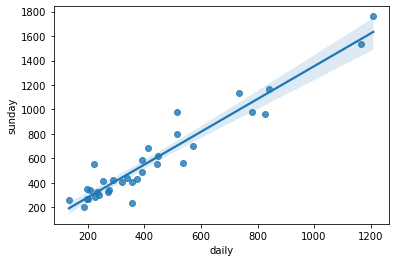

In [17]:
sns.regplot(x = 'daily', y = 'sunday', data = newspaper_data)

In [25]:
sns.set_theme(style='darkgrid',palette='rainbow')

<AxesSubplot:xlabel='daily', ylabel='sunday'>

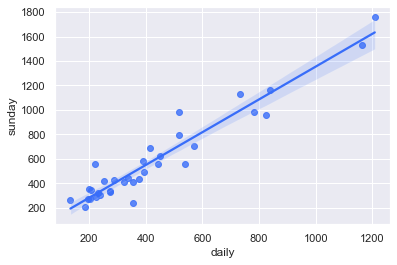

In [26]:
sns.regplot(x = 'daily', y = 'sunday', data = newspaper_data)

## 7. Model Evaluation

In [18]:
linear_model.aic,linear_model.rsquared

(417.7004608345636, 0.9180596895873295)

## 8. Model deployement

In [1]:
from pickle import dump

In [2]:
dump(linear_model,open('linear_model.pkl','wb')) #Serialzation

NameError: name 'linear_model' is not defined

In [21]:
from pickle import load

In [22]:
loaded_model = load(open('linear_model.pkl','rb')) #Deserialzation

In [23]:
loaded_model.predict(new_data)

0    281.778581
1    549.721533
2    482.735795
3    147.807106
dtype: float64